<div style="text-align: center">
<h2><font color="#004D7F" size=6>Modelado - Algoritmos de ML</font></h2>
<h1></h1>
<div style="text-align: center">
<font color="#004D7F" size=5>Curso: Inteligencia Artificial</font><br>
<font color="#004D7F" size=5>Ing. Juan Villegas Cubas</font><br>
<br><br>
<div style="text-align: right">
<font color="#004D7F" size=3>Agosto 2023</font><br>

In [6]:
batch_size = 1
width_shape = 100
height_shape = 100
epochs=10

In [8]:
import pathlib
ruta_train=pathlib.Path("resources/files/training")
ruta_val=pathlib.Path("resources/files/validation")

In [9]:
categorias = ['A','B','C','D','E','F','G','H','I','J','K','L','M','N','O','P','Q','R','S','T','U','V','W','X','Y','Z']

In [4]:
import os
import cv2

dataTrain = []

def create_data_train():
    for category in categorias:
        path=os.path.join(ruta_train, category)
        class_num=categorias.index(category)
        for img in os.listdir(path):
            try:
                img_array=cv2.imread(os.path.join(path,img))
                new_array=cv2.resize(img_array,(width_shape,height_shape))
                dataTrain.append([new_array,class_num])
            except Exception as e:
                pass
create_data_train()

In [10]:
import os
import cv2

dataTrain = []

def create_data_train():
    for category in categorias:
        path = os.path.join(ruta_train, category)
        class_num = categorias.index(category)
        for img in os.listdir(path):
            try:
                img_path = os.path.join(path, img)
                img_array = cv2.imread(img_path)
                gray_img = cv2.cvtColor(img_array, cv2.COLOR_BGR2GRAY)  # Convert to grayscale
                new_array = cv2.resize(gray_img, (width_shape, height_shape))
                dataTrain.append([new_array, class_num])
            except Exception as e:
                pass

# Define the 'categorias', 'ruta_train', 'width_shape', and 'height_shape' variables before calling create_data_train

# Call the function to create the grayscale dataTrain list
create_data_train()


In [5]:
dataVal = []
def create_data_val():
    for category in categorias:
        path=os.path.join(ruta_val, category)
        class_num=categorias.index(category)
        for img in os.listdir(path):
            try:
                img_array=cv2.imread(os.path.join(path,img))
                new_array=cv2.resize(img_array,(width_shape,height_shape))
                dataVal.append([new_array,class_num])
            except Exception as e:
                pass
create_data_val()

In [12]:
dataVal = []

def create_data_val():
    for category in categorias:
        path = os.path.join(ruta_val, category)
        class_num = categorias.index(category)
        for img in os.listdir(path):
            try:
                img_path = os.path.join(path, img)
                img_array = cv2.imread(img_path)
                gray_img = cv2.cvtColor(img_array, cv2.COLOR_BGR2GRAY)  # Convert to grayscale
                new_array = cv2.resize(gray_img, (width_shape, height_shape))
                dataVal.append([new_array, class_num])
            except Exception as e:
                pass

# Call the function to create the grayscale dataVal list
create_data_val()


In [11]:
len(dataTrain)

7599

In [13]:
len(dataVal)

3858

In [14]:
import numpy as np

X_train=[]
y_train=[]

for categories, label in dataTrain:
    X_train.append(categories)
    y_train.append(label)

X_train= np.array(X_train).reshape(len(dataTrain),-1)

In [15]:
X_val=[]
y_val=[]

for categories, label in dataVal:
    X_val.append(categories)
    y_val.append(label)

X_val= np.array(X_val).reshape(len(dataVal),-1)

In [16]:
X_train = X_train/255.0
X_val = X_val/255.0
y_train=np.array(y_train)
y_val=np.array(y_val)

In [17]:
# Evaluacion base

from sklearn.linear_model import LogisticRegression
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis
from sklearn.ensemble import RandomForestClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.svm import SVC

modelos = []
modelos.append(('LR', LogisticRegression()))
modelos.append(('LDA', LinearDiscriminantAnalysis()))
modelos.append(('RF', RandomForestClassifier()))
modelos.append(('DT', DecisionTreeClassifier()))
modelos.append(('SVM', SVC()))

In [ ]:
! pip install pandas


In [18]:
from sklearn.model_selection import KFold, cross_val_score
from sklearn.metrics import cohen_kappa_score
import pandas as pd

num_folds=10
results = []
names = []
AcurracyBase = []
KappaBase  = []
DesvBase = []

for nombre, modelo in modelos:
    kfold = KFold(n_splits=num_folds, random_state=7, shuffle=True)
    cv_results = cross_val_score(modelo, X_train, y_train, cv=kfold)
    results.append(cv_results)
    names.append(nombre)
    AcurracyBase.append(cv_results.mean()*100.0)
    DesvBase.append(cv_results.std()*100.0)
    modelo.fit(X_train, y_train)
    predicted = modelo.predict(X_val)
    cohen_score=cohen_kappa_score(y_val, predicted)
    KappaBase.append(cohen_score*100.0)

data  = np.zeros((0, len(names)))
Metricas  = pd.DataFrame(data, columns=names)
Metricas.loc['Accuracy_Base']= AcurracyBase
Metricas.loc['Accuracy_Des_Base']= DesvBase
Metricas.loc['Kappa_Base']= KappaBase
Metricas

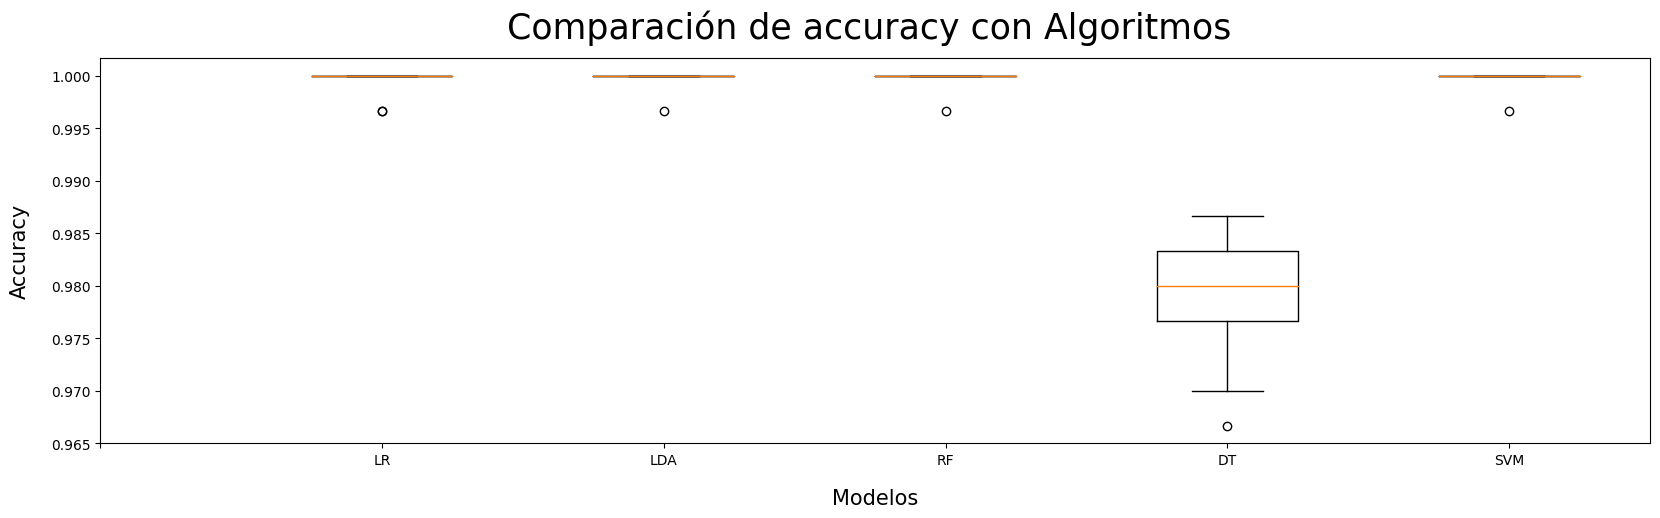

In [27]:
#Visualización de los resultados con accuracy
import matplotlib.pyplot as plt
plt.figure(figsize=(20,5))
plt.boxplot(results)
plt.xticks(range(len(names)+1),([" "] + names))
plt.xlabel("Modelos",fontdict={"fontsize":15},labelpad=15.0)
plt.ylabel("Accuracy",fontdict={"fontsize":15},labelpad=15.0)
plt.title("Comparación de accuracy con Algoritmos ",fontdict={"fontsize":25},pad=15.0)
plt.show()

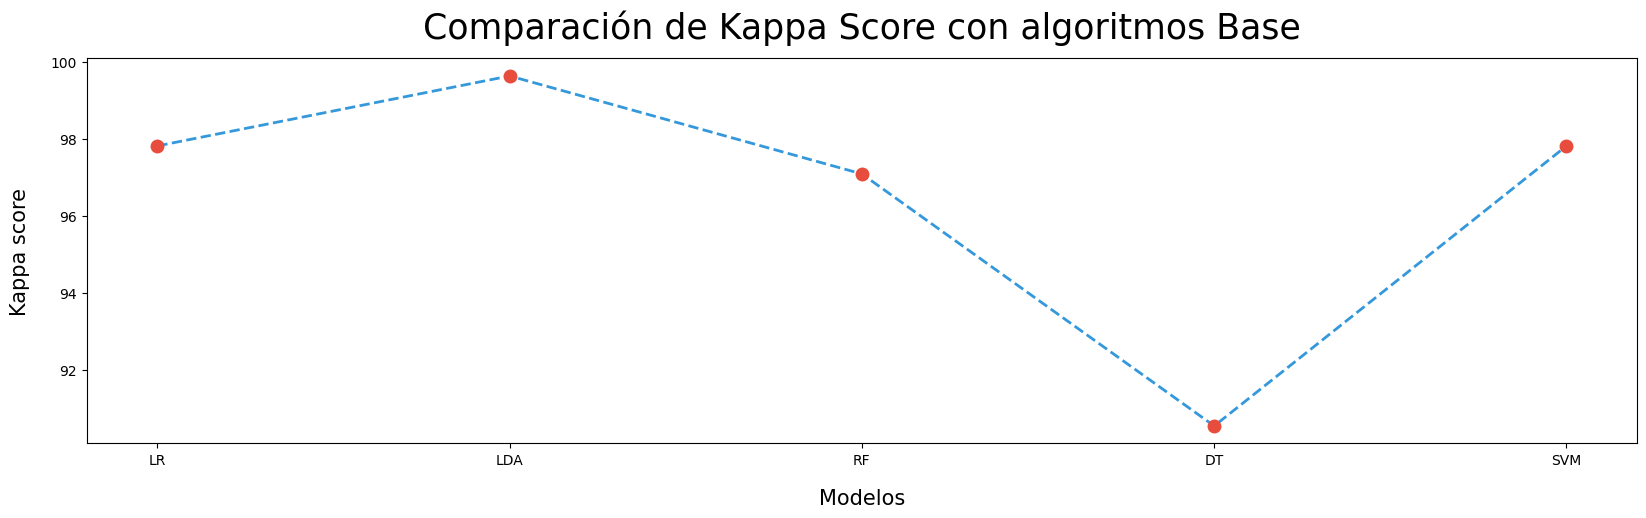

In [28]:
#Visualización de los resultados con kappa
plt.figure(figsize=(20,5))
plt.plot(range(len(names)),
         Metricas.loc[["Kappa_Base"],names].to_numpy().reshape(-1,1),
         marker="o",ms=9.0,mfc="#e74c3c",mec="#e74c3c",ls='--',lw=2.0,color="#3498db")
plt.xticks(range(len(names)),names)
plt.xlabel("Modelos",fontdict={"fontsize":15},labelpad=15.0)
plt.ylabel("Kappa score",fontdict={"fontsize":15},labelpad=15.0)
plt.title("Comparación de Kappa Score con algoritmos Base",fontdict={"fontsize":25},pad=15.0)
plt.show()

In [29]:
from sklearn.model_selection import GridSearchCV
from sklearn.model_selection import RandomizedSearchCV

from sklearn.svm import SVC
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis
from sklearn.naive_bayes import GaussianNB

from sklearn.ensemble import AdaBoostClassifier
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.ensemble import BaggingClassifier

In [30]:
from sklearn.svm import SVC

c=np.array([1.0, 2.0, 3.0, 4.0, 5.0, 6.0, 7.0])
k=np.array(['linear', 'rbf', 'poly'])
param_grid=dict(C=c, kernel=k)
model=SVC()
grid=GridSearchCV(model, param_grid=param_grid, cv=5)
grid.fit(X_val, y_val)
print(f"Mejor Accuracy: {grid.best_score_.mean()*100.0:,.2f}%")
print(f"Mejor C: {grid.best_estimator_.C}")
print(f"Mejor Kernel: {grid.best_estimator_.kernel}")

Mejor Accuracy: 97.17%
Mejor C: 1.0
Mejor Kernel: poly


In [33]:
from sklearn.ensemble import ExtraTreesClassifier

n_estimators=np.array([5,10,20,50,100,200])
max_features=np.array([1, 2, 3, 4, 5, 6, 7, 10])
random_state = np.array([7])
param_grid=dict(n_estimators=n_estimators, max_features=max_features, random_state=random_state)
model=ExtraTreesClassifier()

grid=GridSearchCV(model, param_grid=param_grid, cv=5)
grid.fit(X_val, y_val)
print(f"Mejor Accuracy: {grid.best_score_.mean()*100.0:,.2f}%")
print(f"Mejor n_estimators: {grid.best_estimator_.n_estimators}")
print(f"Mejor max_features: {grid.best_estimator_.max_features}")

Mejor Accuracy: 98.00%
Mejor n_estimators: 10
Mejor max_features: 3
